In [17]:
try:
    import pandas as pd
    import numpy as np
    import scipy
    from matplotlib import pyplot as plt
    print ("Imported all libraries successfully...")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} numpy
    !conda install --yes --prefix {sys.prefix} pandas
    !conda install --yes --prefix {sys.prefix} matplotlib
    !conda install --yes --prefix {sys.prefix} scipy
    print ("Some libraries not found, installing...")
    
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df = pd.read_csv("churn.csv")

gender_onehot = pd.get_dummies(df['Gender'], drop_first=True)

# Drop the original 'gender' column from the DataFrame
df = df.drop('Gender', axis=1)

# Concatenate the one-hot encoded 'gender' column with the original DataFrame
df = pd.concat([df, gender_onehot], axis=1)

# Rename the one-hot encoded columns to 'is_male'
df = df.rename(columns={'Male': 'is_male'})

df.info()

Imported all libraries successfully...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
 13  is_male          10000 non-null  uint8  
dtypes: float64(2), int64(9), object(2), uint8(1)
memory usage: 1.0+ MB


In [18]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,is_male
0,1,15634602,Hargrave,619,France,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2a8bd16a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2a8bd1dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2a8bd1310>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2a8bcf520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2a8bcf8b0>],
 'means': []}

Text(0.5, 0, 'CreditScore')

Text(0, 0.5, 'Credit score Value')

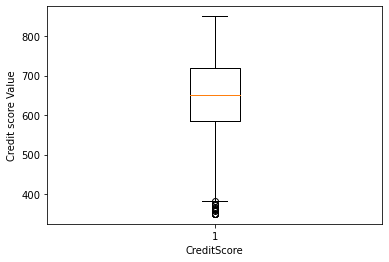

In [19]:
credit_column = df["CreditScore"]

plt.boxplot(credit_column)

plt.xlabel("CreditScore")
plt.ylabel("Credit score Value")

<BarContainer object of 2 artists>

0    7963
1    2037
Name: Exited, dtype: int64


<AxesSubplot:>

Text(0.5, 0, 'Churn')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Churn Frequency')

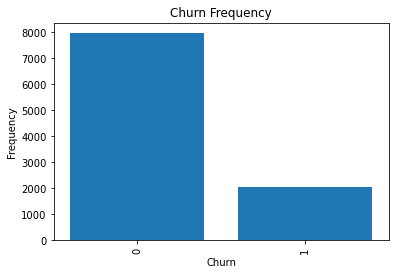

In [20]:
counts = df['Exited'].value_counts()

# Create a bar graph using matplotlib
plt.bar(counts.index, counts.values)

print(counts)
counts.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.title('Churn Frequency')
plt.show()

<AxesSubplot:ylabel='Exited'>

Text(0.5, 1.0, 'Churn Frequency for Males')

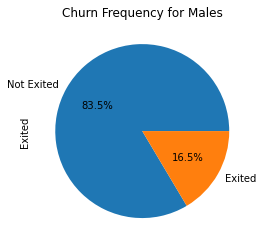

In [21]:
male_df = df[df['is_male'] == 1]

# Count the frequency of 0 and 1 in the 'Exited' column for the filtered DataFrame
counts = male_df['Exited'].value_counts()

# Create a pie chart of the results
counts.plot(kind='pie', autopct='%1.1f%%', labels=['Not Exited', 'Exited'])
plt.title('Churn Frequency for Males')
plt.show()

<AxesSubplot:ylabel='Exited'>

Text(0.5, 1.0, 'Churn Frequency for Females')

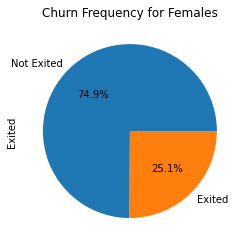

In [22]:
female_df = df[df['is_male'] == 0]

# Count the frequency of 0 and 1 in the 'Exited' column for the filtered DataFrame
counts = female_df['Exited'].value_counts()

# Create a pie chart of the results
counts.plot(kind='pie', autopct='%1.1f%%', labels=['Not Exited', 'Exited'])
plt.title('Churn Frequency for Females')
plt.show()